<a href="https://colab.research.google.com/github/jobygeorge99/Eye-disease-classification-CNN/blob/main/Eye_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section 1


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
!ls

drive  sample_data


In [ ]:
train_dataset_url="/content/drive/MyDrive/semester3/mini_project/eye-fundus_image/ODIR-5K/ODIR-5K/Training_Images"
test_dataset_url="/content/drive/MyDrive/semester3/mini_project/eye-fundus_image/ODIR-5K/ODIR-5K/Testing Images"

In [ ]:
training_data = os.listdir(train_dataset_url)
test_data = os.listdir(test_dataset_url)
print(training_data[0:5])
print(test_data[0:5])

KeyboardInterrupt: ignored

In [ ]:
print('Number of training_data:', len(training_data))
print('Number of test_data:', len(test_data))

In [ ]:
print(training_data[0])

In [ ]:
i=cv2.imread(train_dataset_url+"/"+training_data[0])
cv2_imshow(i)

In [ ]:
i=cv2.imread(train_dataset_url+"/"+training_data[0],1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
i.shape

Convert the images to numpy arrays

In [ ]:
train_data_array = []

i=0
for img_file in training_data:
  i+=1
  if i>=50:
    break
  image = Image.open(train_dataset_url + "/" + img_file)
  image = image.resize((192,128))
  image = image.convert('RGB')
  image = np.array(image)
  train_data_array.append(image)

In [ ]:
test_data_array = []

i=0
for img_file in training_data:
  i+=1
  if i>=50:
    break
  image = Image.open(train_dataset_url + "/" + img_file)
  image = image.resize((192,128))
  image = image.convert('RGB')
  image = np.array(image)
  test_data_array.append(image)

In [ ]:
len(train_data_array)

In [ ]:
train_data_array[0]

In [ ]:
type(train_data_array[0])

In [ ]:
train_data_array[0].shape

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(train_data_array[0], interpolation='nearest')
plt.show()

In [ ]:
train_data_array=np.array(train_data_array)
test_data_array=np.array(test_data_array)

In [ ]:
print( train_data_array.shape, test_data_array.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_array, test_data_array, test_size=0.75, random_state=2)


In [ ]:
print( X_train.shape, Y_train.shape)

In [ ]:
print(X_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# New section 2

**Version 2:**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
!ls

In [3]:
train_dataset_url="/content/drive/MyDrive/semester3/mini_project/eye-fundus_image/ODIR-5K/ODIR-5K/Training_Images"
test_dataset_url="/content/drive/MyDrive/semester3/mini_project/eye-fundus_image/ODIR-5K/ODIR-5K/Testing Images"
data_file=pd.read_csv('/content/drive/MyDrive/semester3/mini_project/eye-fundus_image/ODIR-5K/full_df.csv')


In [4]:
left_image=list(data_file['Left-Fundus'])
right_image=list(data_file['Right-Fundus'])
print(left_image)

['0_left.jpg', '1_left.jpg', '2_left.jpg', '4_left.jpg', '5_left.jpg', '6_left.jpg', '7_left.jpg', '8_left.jpg', '9_left.jpg', '10_left.jpg', '11_left.jpg', '13_left.jpg', '14_left.jpg', '15_left.jpg', '16_left.jpg', '17_left.jpg', '18_left.jpg', '19_left.jpg', '21_left.jpg', '23_left.jpg', '24_left.jpg', '26_left.jpg', '27_left.jpg', '28_left.jpg', '29_left.jpg', '31_left.jpg', '32_left.jpg', '33_left.jpg', '34_left.jpg', '35_left.jpg', '37_left.jpg', '38_left.jpg', '40_left.jpg', '42_left.jpg', '43_left.jpg', '44_left.jpg', '45_left.jpg', '46_left.jpg', '47_left.jpg', '48_left.jpg', '49_left.jpg', '50_left.jpg', '51_left.jpg', '52_left.jpg', '53_left.jpg', '54_left.jpg', '55_left.jpg', '56_left.jpg', '58_left.jpg', '60_left.jpg', '61_left.jpg', '62_left.jpg', '64_left.jpg', '65_left.jpg', '66_left.jpg', '67_left.jpg', '68_left.jpg', '71_left.jpg', '72_left.jpg', '73_left.jpg', '74_left.jpg', '75_left.jpg', '77_left.jpg', '78_left.jpg', '79_left.jpg', '81_left.jpg', '82_left.jpg', '83

In [5]:
left_label=data_file.iloc[:,7:15]
left_label=left_label.values.tolist()
print(left_label)

[[0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0

In [ ]:
# training_data = os.listdir(train_dataset_url)
# test_data = os.listdir(test_dataset_url)
# print(training_data[0:5])
# print(test_data[0:5])

In [ ]:
# print('Number of training_data:', len(training_data))
# print('Number of test_data:', len(test_data))

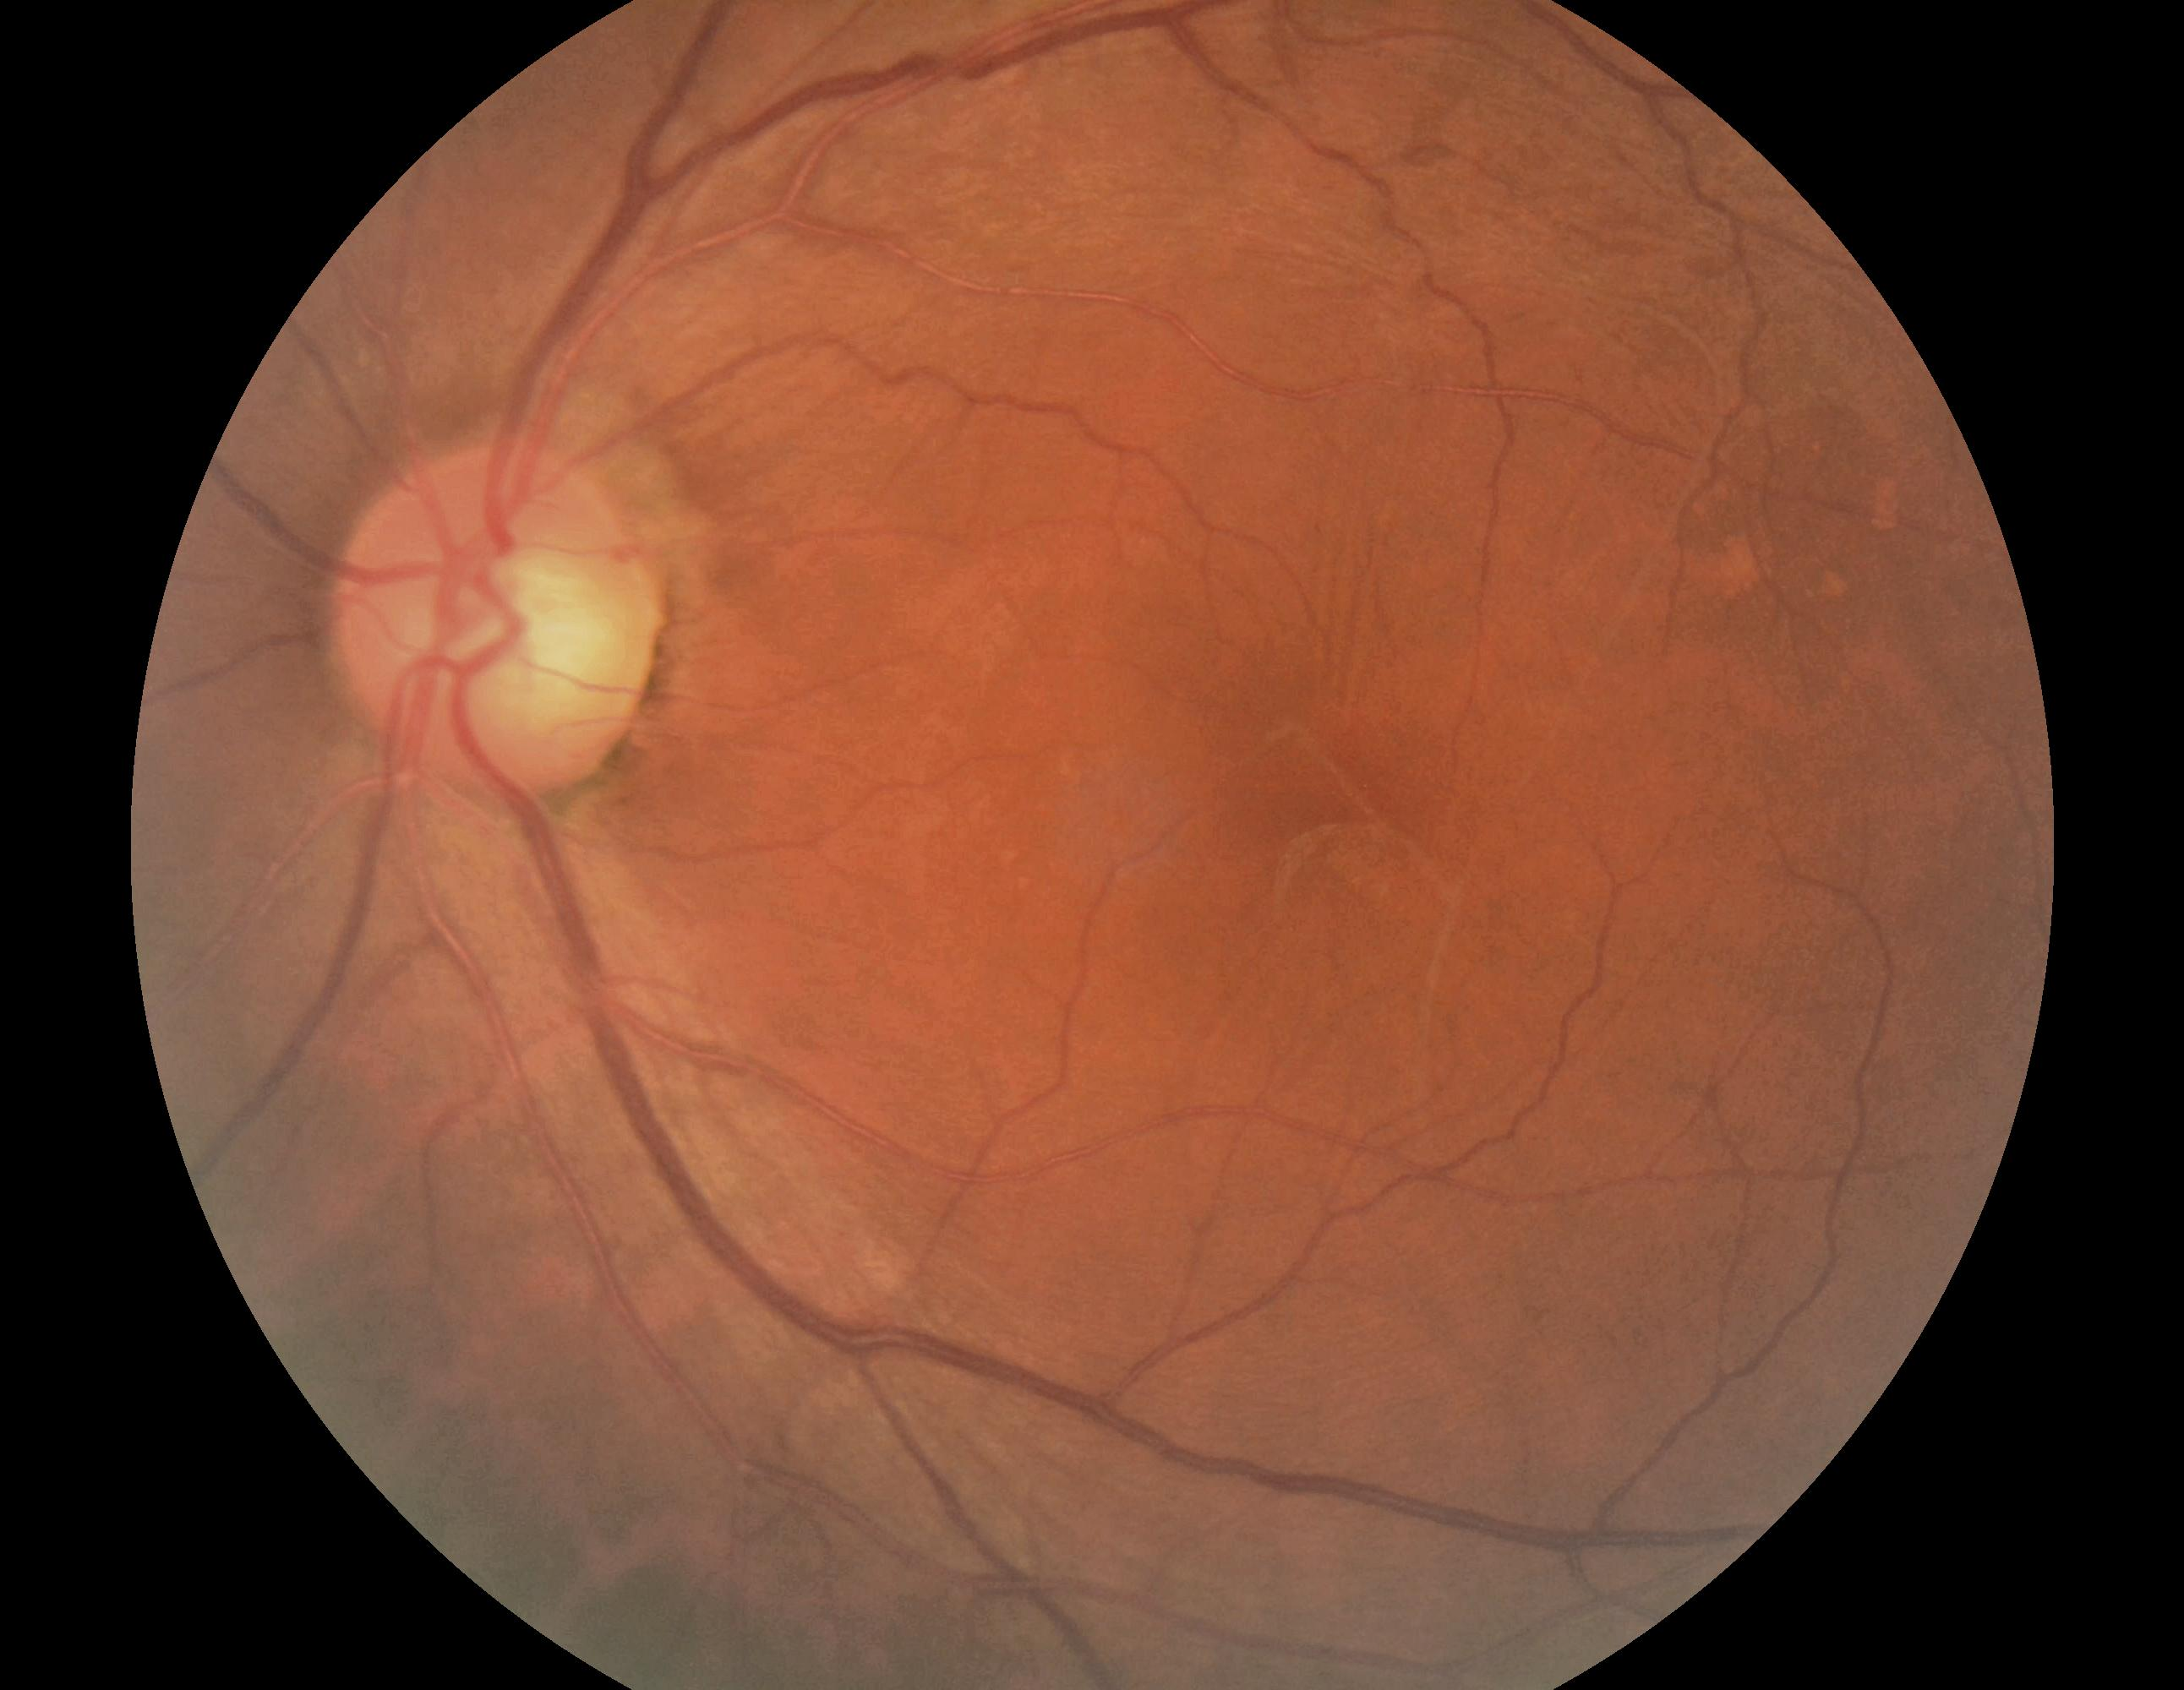

In [8]:
i=cv2.imread(train_dataset_url+"/"+left_image[9])
cv2_imshow(i)

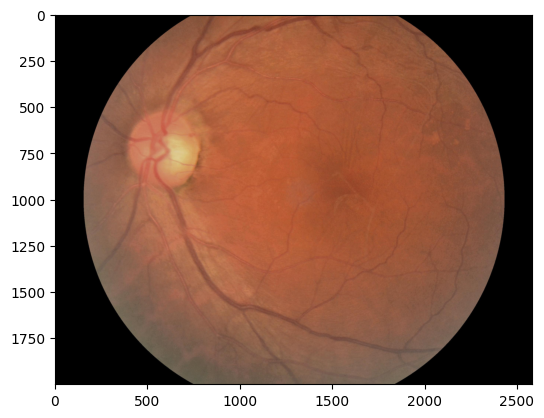

In [9]:
i=cv2.imread(train_dataset_url+"/"+left_image[9],1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
i.shape

(2000, 2584, 3)

In [11]:
left_image=left_image[:50]
len(left_image)

50

In [12]:
left_label=left_label[0:50]
len(left_label)

50

In [27]:
x_train,x_test,y_train,y_test=train_test_split(left_image,left_label,test_size=0.30, random_state=1)

In [14]:
print(x_train)

['51_left.jpg', '60_left.jpg', '32_left.jpg', '27_left.jpg', '15_left.jpg', '50_left.jpg', '19_left.jpg', '54_left.jpg', '29_left.jpg', '28_left.jpg', '5_left.jpg', '42_left.jpg', '16_left.jpg', '37_left.jpg', '11_left.jpg', '34_left.jpg', '53_left.jpg', '43_left.jpg', '21_left.jpg', '24_left.jpg', '31_left.jpg', '7_left.jpg', '8_left.jpg', '56_left.jpg', '1_left.jpg', '18_left.jpg', '0_left.jpg', '17_left.jpg', '6_left.jpg', '13_left.jpg', '10_left.jpg', '9_left.jpg', '14_left.jpg', '52_left.jpg', '46_left.jpg']


In [15]:
print(y_train)

[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0]]


Convert the images to numpy arrays

In [28]:
x_train_resized = []

i=0
for img_file in x_train:
  image = Image.open(train_dataset_url + "/" + img_file)
  image = image.resize((192,128))
  image = image.convert('RGB')
  image = np.array(image)
  x_train_resized.append(image)

In [33]:
x_test_resized = []

i=0
for img_file in x_test:
  image = Image.open(train_dataset_url + "/" + img_file)
  image = image.resize((192,128))
  image = image.convert('RGB')
  image = np.array(image)
  x_test_resized.append(image)

In [ ]:
print(x_train_resized)

In [ ]:
print(x_test_resized)

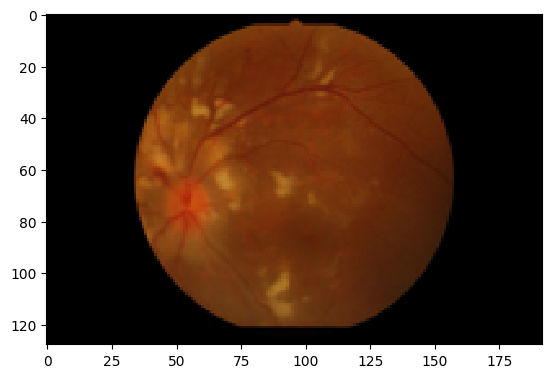

In [37]:
from matplotlib import pyplot as plt
plt.imshow(x_train_resized[9], interpolation='nearest')
plt.show()

In [ ]:
x_train_resized[0]

In [ ]:
x_test_resized[0]

In [41]:
print(type(x_train_resized),type(y_train))

<class 'list'> <class 'list'>


**convert it to numpy array: converting list of arrays to array of arrays**

In [62]:
x_train_resized = np.asarray(x_train_resized, dtype=np.float32)
x_test_resized = np.asarray(x_train_resized, dtype=np.float32)

In [64]:
print(type(x_train_resized),type(y_train_resized))

<class 'numpy.ndarray'> <class 'list'>


In [ ]:
print(x_train_resized[0])

In [67]:
x_train_resized[0].shape

(128, 192, 3)

In [ ]:
#left_image_resized=np.array(left_image_resized)

In [ ]:
#print( x_train_resized.shape) ??????????

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [69]:
print(len(x_test),len(y_test))

15 15


In [70]:
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D( 10, (3,3), activation="relu", input_shape=(28,28,1)))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))

cnnModel.add(layers.Dense(32, activation="relu"))

cnnModel.add(layers.Dense(10, activation="softmax"))

cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        5824      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [71]:
cnnModel.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [72]:
history = cnnModel.fit(x_train, y_train, epochs=20, batch_size=32,  validation_data=(x_test,y_test))

Epoch 1/20


ValueError: ignored

In [ ]:
testLoss, testAccuracy = cnnModel.evaluate(x_test, y_test)

In [ ]:
#y_pred = cnnModel.predict_classes(x_test)
predict_x=cnnModel.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

In [53]:
!ls

drive  sample_data


In [55]:
# %cd /content/
# !git pull

/content
fatal: not a git repository (or any of the parent directories): .git
